INITIAL SCRIPT

In [10]:
list(range(1,21))
#Tper_L


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

ISSUES WITH PLOTTING ATTENUATION LENGTH DUE TO LONGITUDINAL TRANSMISSION BEING GREATER THAN THE TRANSVERSE.
TRY NORMALIZING LONGITUDINAL TRANSMITTANCE WRT TRANSVERSE TRANSMITTANCE 

150
Stored with first incidence normalization
150
Stored with first incidence normalization
150
Stored with first incidence normalization
32
Stored with first incidence normalization
464.0nm is the cutoff
150
Stored with first incidence normalization
61
Stored with first incidence normalization
522.0nm is the cutoff
150
Stored with first incidence normalization
150
Stored with first incidence normalization
150
Stored with first incidence normalization
134
Stored with first incidence normalization
668.0nm is the cutoff
150
Stored with first incidence normalization
143
Stored with first incidence normalization
686.0nm is the cutoff
150
Stored with first incidence normalization
150
Stored with first incidence normalization
150
Stored with first incidence normalization
119
Stored with first incidence normalization
638.0nm is the cutoff
150
Stored with first incidence normalization
150
Stored with first incidence normalization
150
Stored with first incidence normalization
150
Stored with fi

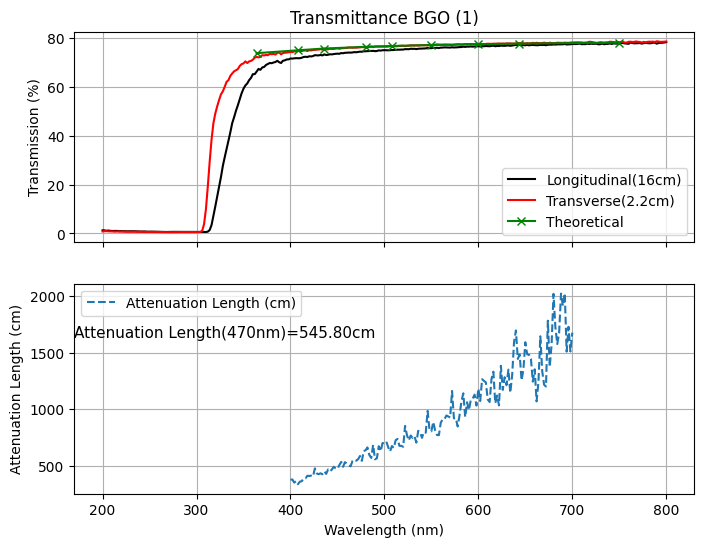

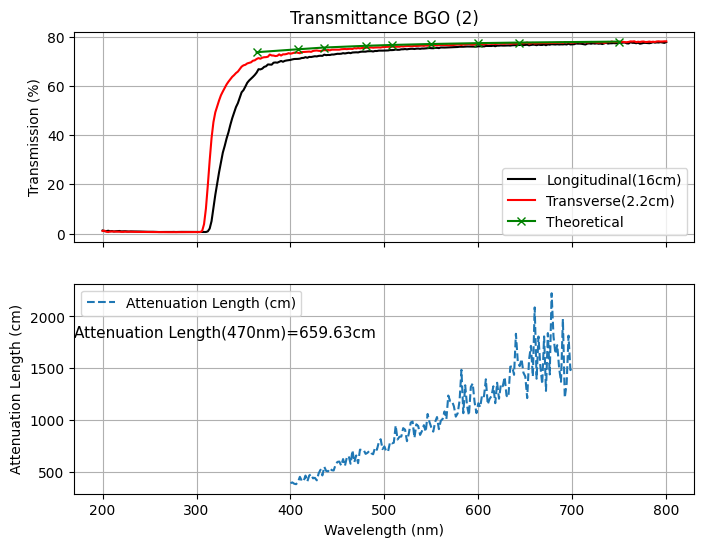

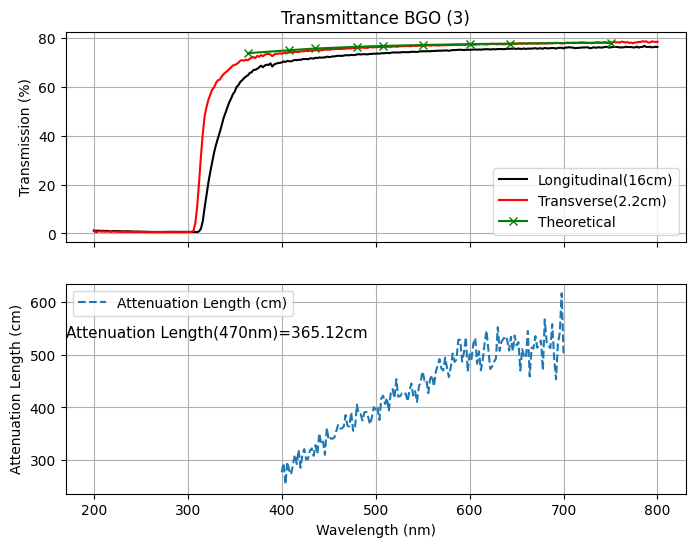

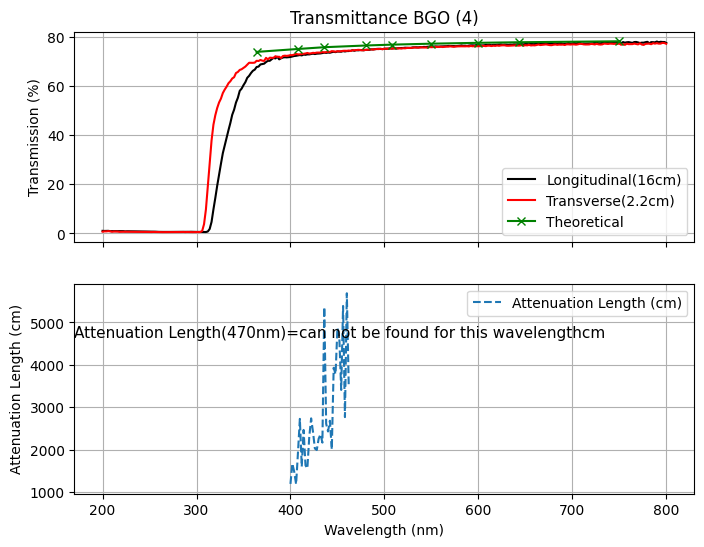

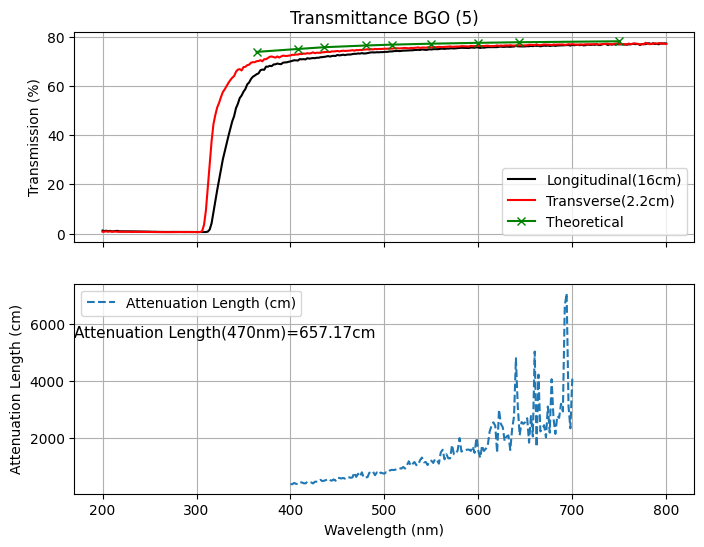

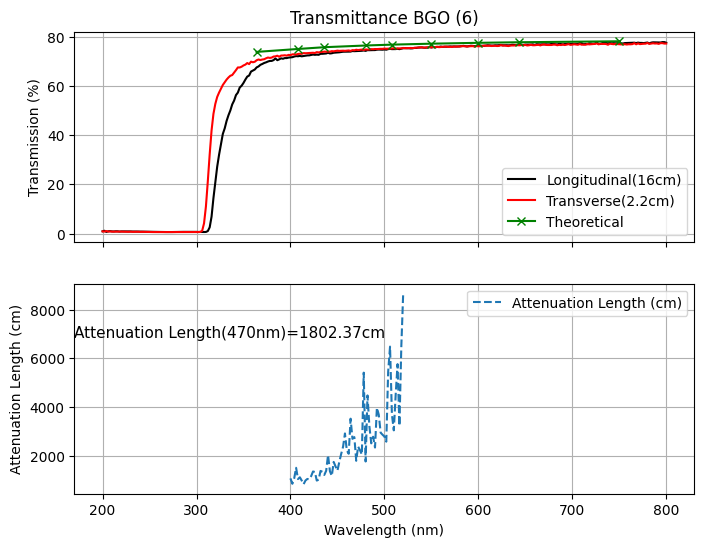

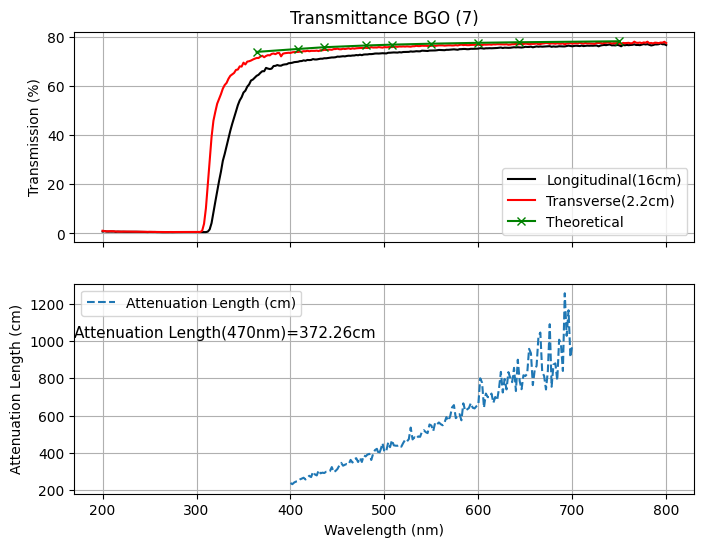

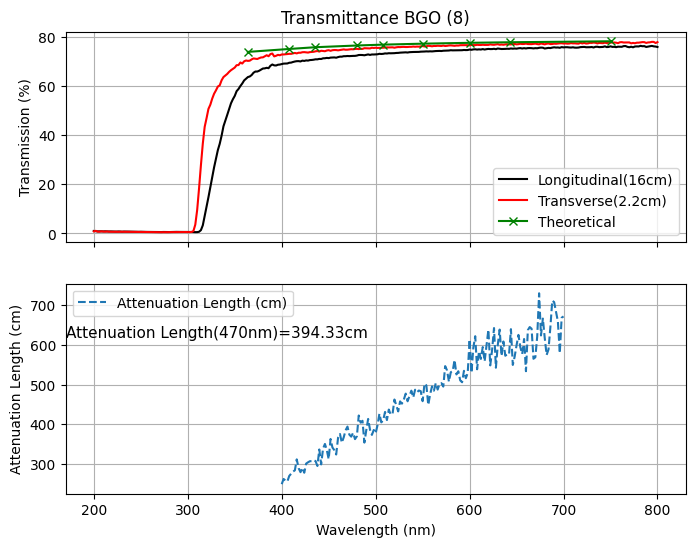

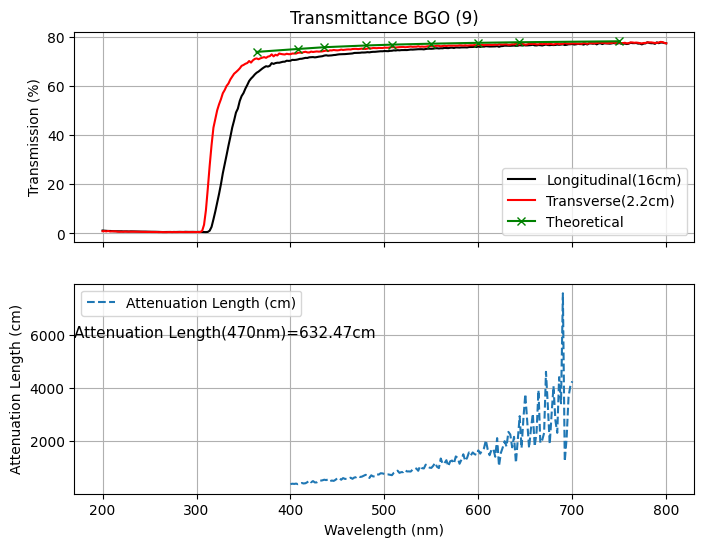

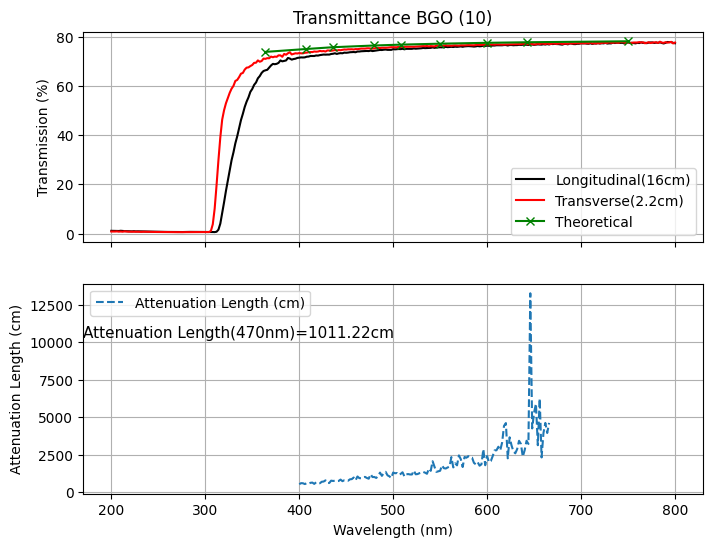

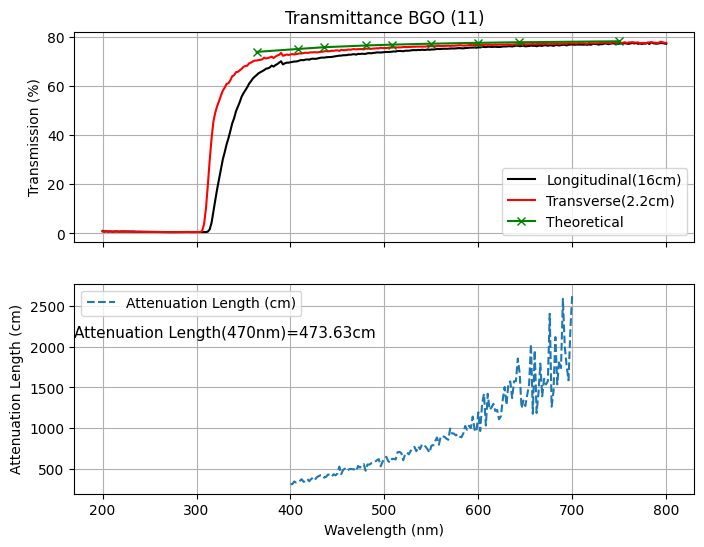

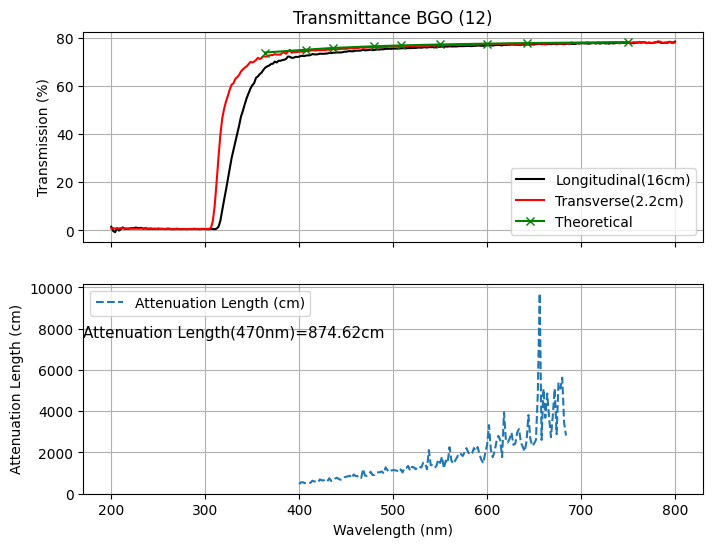

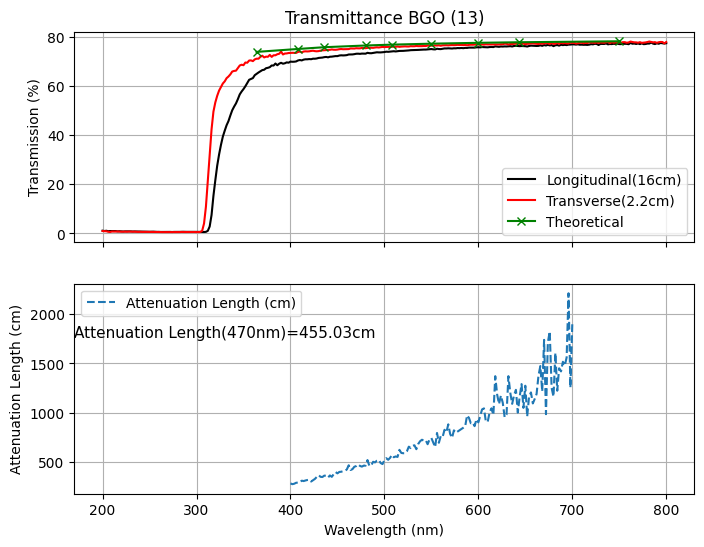

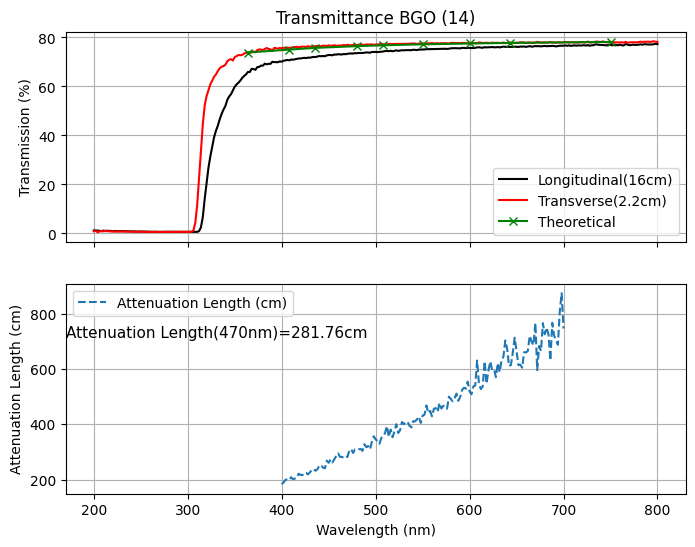

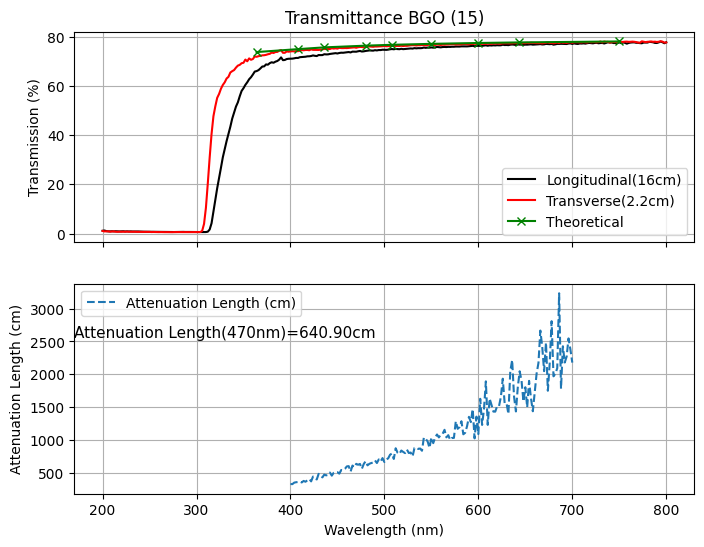

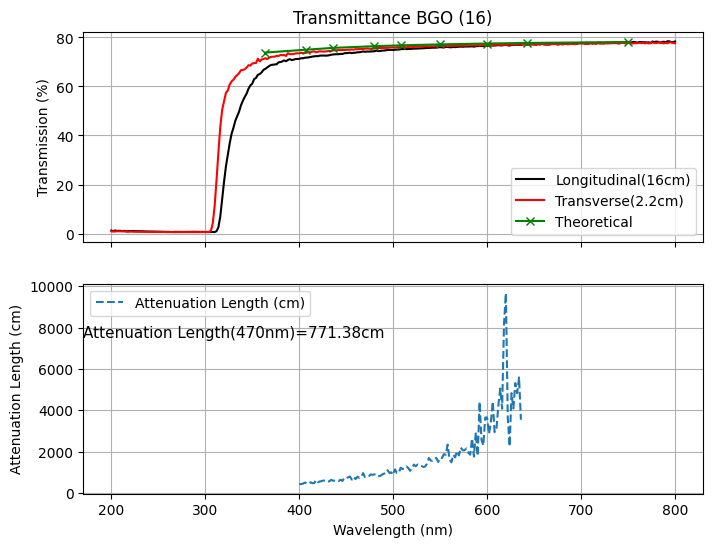

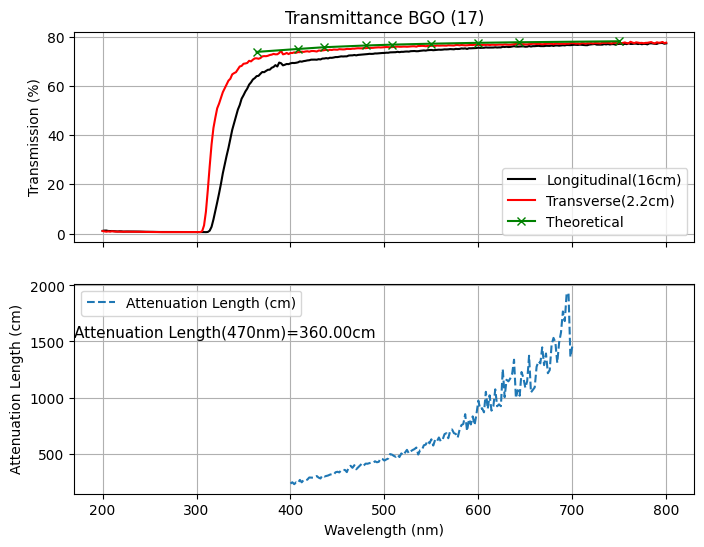

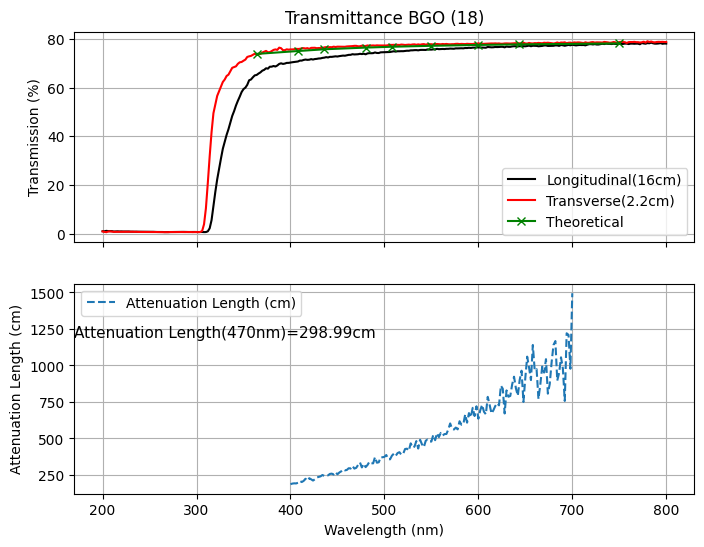

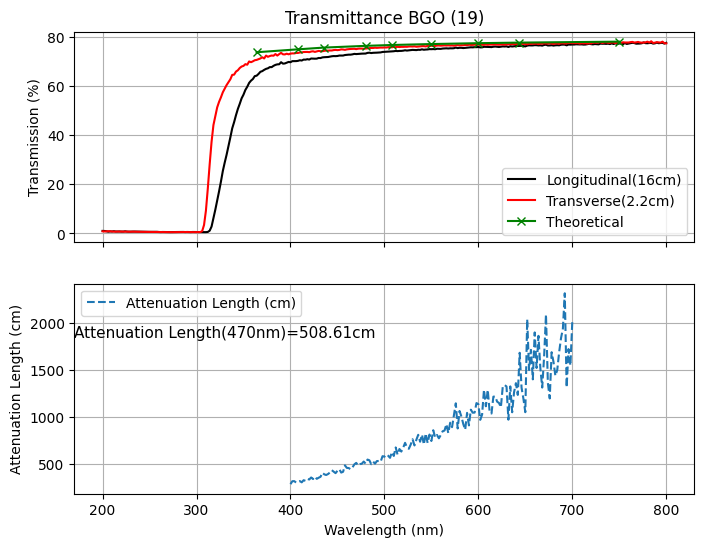

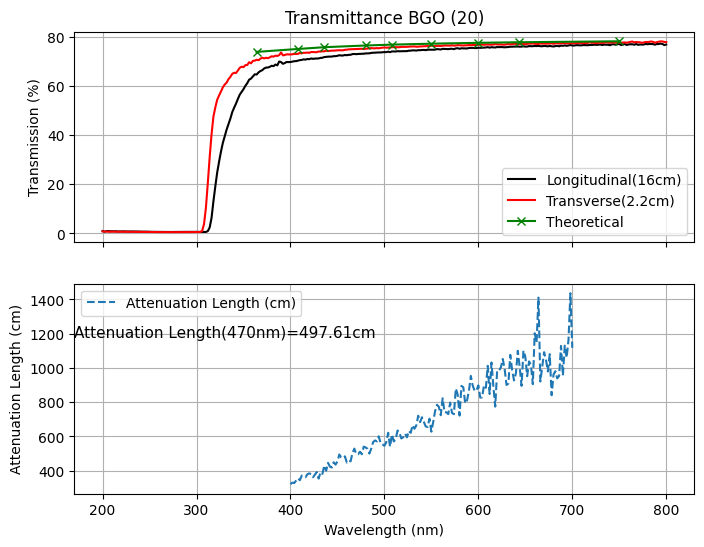

Transmissions executed successfully


In [3]:
#IMPORT PACKAGES
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
#from scipy.signal import find_peaks

# INITIALISE REQUIRED LISTS AND VARIABLES
lam = np.linspace(200,800,301) #WAVELENGTH SPAN
#lam_at = np.linspace(300,520,111) #wavelength for attenuation length calculation
lam_at = np.linspace(400,700,151) # REDUCED WAVLENGTH RANGE FOR THE CACULATION OF ATTENNUATION LENGTH
# Tper_L = ['1', '2', '3']#, '4', '5', '6']
# Tper_L_N = ['1', '2', '3']#,'4', '5', '6']
# Tper_T = ['1', '2', '3']#,'4', '5', '6']
# Tper_L_at = ['1', '2', '3']#,'4', '5', '6']
# Tper_L_at_N = ['1', '2', '3']#,'4', '5', '6']
# Tper_T_at = ['1', '2', '3']#,'4', '5', '6']
# AtLen = ['1', '2', '3']#,'4', '5', '6']
# lam_At=['1', '2', '3']#, '4', '5', '6']
Tper_L = list(range(1, 21))#['1', '2', '3', '4', '5', '6', '7', '8'] #LONGITUDINAL TRANSMISSION PERCENTAGE 
#Tper_L_N = list(range(1, 21))#['1', '2', '3','4', '5', '6', '7', '8'] #LONGITUDINAL TRANSMISSION PERCENTAGE- NORMALISED
Tper_T = list(range(1, 21))#['1', '2', '3','4', '5', '6', '7', '8'] #TRANSVERSE TRANSMISSION PERCENTAGE
Tper_L_at = list(range(1, 21))#['1', '2', '3','4', '5', '6', '7', '8']#, '7', '8', '9'] 
Tper_L_at_N =list(range(1, 21))# ['1', '2', '3','4', '5', '6', '7', '8']
Tper_T_at = list(range(1, 21))#['1', '2', '3','4', '5', '6', '7', '8']
AtLen = list(range(1, 21))#['1', '2', '3','4', '5', '6', '7', '8']
lam_At=list(range(1, 21))#['1', '2', '3', '4', '5', '6', '7', '8']
#THEORETICAL DATA
lam_th = [363.9,407.7,435.8,480,508,550,600,643,750]
tran_th = [73.83,75.01,75.73,76.43,76.78,77.17,77.52,77.75,78.15]

L_l = 16 #cm  #LENGTH IN LONGITUDINAL DIRECTION
L_t = 2.2 #cm #LENGTH IN TRANSVERSE DIRECTION
#for i in {1, 2, 3}:

for i in list(range(1,21)): # For all 20 crystals
    #
    Tper_L[i-1] = []
    Tper_L_at[i-1] = []
    #print(Tper_L[1])
    Tper_T[i-1] = []
    Tper_T_at[i-1] = []
    AtLen[i-1] = []

            
    #TRANSVERSE TRANSMISSION

    with open('B'+str(i)+'TT3.ASP', 'r') as file:           #OPEN FILES AND STORE THE TRANSMISSION DATA IN RESPECTIVE LIST
        for line_number, line in enumerate(file, start=1):
            if line_number >= 7 and line_number < 308:      #LINE NUMBER BASED ON DATA POSITION IN THE TXT FILE
            #if line_number >= 7 and line_number < 258:
                line =line.strip()
                try:
                # print(lin)
                    perT = float(line.strip())
            #       print(line_number, line)
                    Tper_T[i-1].append(perT)


                except ValueError:
                    print(f"skipping invalid line: {line}")
                    
    #LONGITUDINAL TRANSMISSION
    
    with open('B'+str(i)+'LT3.ASP', 'r') as file:           #OPEN FILES AND STORE THE TRANSMISSION DATA IN RESPECTIVE LIST
        for line_number, line in enumerate(file, start=1):
            if 7 <= line_number < 308:
            #if line_number >= 7 and line_number < 258:
                line =line.strip()
                try:
                # print(lin)
                    perL = float(line.strip())
             #       print(line_number, line)
                    Tper_L[i-1].append(perL)
                except ValueError:
                    print(f"skipping invalid line: {line}")
                    continue 

        # # Normalize with respect to transmission if applicable
        # if Tper_T[i-1][300] < Tper_L[i-1][300]:
        #     for j in list(range(301)):
        #         Tper_L_N[i-1][j] = Tper_L[i-1][j]*Tper_T[i-1][300] / Tper_L[i-1][300]
            
                    
        # else:
        #     Tper_L_N[i-1] = Tper_L[i-1]
                
                
    #FOR ATTENUATION
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    #TRANNSVERSE 

    with open('B'+str(i)+'TT3.ASP', 'r') as file:#kya hua
        for line_number, line in enumerate(file, start=1):
            #if line_number >= 57 and line_number < 168:
            if line_number >= 107 and line_number < 258: #index numbers corresponds to lambda = 400 and 702 nm.
                line =line.strip()
                try:
                # print(lin)
                    perT_at = float(line.strip())
             #       print(line_number, line)
                    Tper_T_at[i-1].append(perT_at)


                except ValueError:
                    print(f"skipping invalid line: {line}")
    
    
    #LONGITUDINAL
    Tper_L_at_N[i-1]= []
    
    
    
    #-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 
    # #Storing without Normalization                  
    
    # with open('B'+str(i)+'LT3.ASP', 'r') as file:
    #     for line_number, line in enumerate(file, start=1):
    #         #if line_number >= 57 and line_number < 168:
    #         if line_number >= 107 and line_number < 258:#index numbers corresponds to lambda = 400 and 702 nm.
    #             line =line.strip()
    #             try:
    #             # print(lin)
    #                 perL_at = float(line.strip())
    #          #       print(line_number, line)
    #                 #if perL_at < Tper_T_at[i-1][line_number-107]:
    #                 Tper_L_at_N[i-1].append(perL_at)
    #                 #else:
                        

    #             except ValueError:
    #                 print(f"skipping invalid line: {line}")
    #             #print(line_number)
    #     print("Stored without normalization") 
        
    #-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 
    
    #NORMALIZATION WRT THE FIRST INTERSECTION
    
    with open('B'+str(i)+'LT3.ASP', 'r') as file:
        for line_number, line in enumerate(file, start=1):
            #if line_number >= 57 and line_number < 168:
            #print(line_number)
            if line_number >= 107 and line_number < 258:#index numbers corresponds to lambda = 400 and 702 nm.
                line = line.strip()
                ln=line_number
                try:
                # print(lin)
                    #print(line)
                    perL_at = float(line.strip())
                    # print(ln)
                    # print(perL_at)
                    # print(Tper_T_at[i-1][ln-107])
                    #print(line_number, line)
                    if perL_at < Tper_T_at[i-1][ln-107]:
                        Tper_L_at[i-1].append(perL_at)
                    else:
                        #print(line_number)
                        Tper_L_at[i-1].append(perL_at)
                        break
                    #print(line_number)   
                except ValueError:
                    print(f"skipping invalid line: {line}")
                
          
    norm_index = ln-107     
    print(norm_index)        
    with open('B'+str(i)+'LT3.ASP', 'r') as file: 
        #print(norm_index)
        if perL_at > Tper_T_at[i-1][norm_index]:
            
           
            for line_number, line_N in enumerate(file, start=1):
            #if line_number >= 57 and line_number < 168:
                if line_number >= 107 and line_number < 258:#index numbers corresponds to lambda = 400 and 702 nm.
                    line_N =line_N.strip()
                    
                    try:
                        if norm_index != 7:
                            perL_at_N = float(line_N.strip())* Tper_T_at[i-1][norm_index]/Tper_L_at[i-1][norm_index]
                            Tper_L_at_N[i-1].append(perL_at_N)
                        else:
                            perL_at_N = float(line_N.strip())
                    #print(line_number)   
                    except ValueError:
                       # print("here")
                        print(f"skipping invalid line: {line}")
        else: 
            Tper_L_at_N[i-1] = Tper_L_at[i-1]
    print("Stored with first incidence normalization")             
    #print(Tper_L_at[i-1])
    
    
    #-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 
    # #NORMALIZATION WRT THE TRANSVERSE TRANSMITTANCE AT 800 NM

    # with open('B'+str(i)+'LT3.ASP', 'r') as file:
    #     for line_number, line in enumerate(file, start=1):
    #         #if line_number >= 57 and line_number < 168:
    #         if line_number >= 107 and line_number < 258:#index numbers corresponds to lambda = 400 and 702 nm.
    #             line =line.strip()
    #             try:
    #             # print(lin)
    #                 #print(line)
    #                 perL_at = float(line.strip())
    #         #       print(line_number, line)
    #                 if Tper_T[i-1][300] < Tper_L[i-1][300]: #Comparing Longitudinal and transverse Transmittance at 800nm
    #                     Tper_L_at_N[i-1].append(perL_at*Tper_T[i-1][300]/Tper_L[i-1][300])
    #                 else:
    #                     Tper_L_at_N[i-1].append(perL_at)
    #                 #print(line_number)   
    #             except ValueError:
    #                 print(f"skipping invalid line: {line}")
    # print("Stored with transverse transmittence @ 800nm normalization")  
           
    #-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 
    # Assigning attenuation length values
    lam_At[i-1] = []
    #AtLen[i-1] = []


    m=0
    for t, l in zip(Tper_T_at[i-1], Tper_L_at_N[i-1]):
        if l < t:
            lam_At[i-1].append(float(lam_at[m]))
            value = (L_l - L_t)/math.log(t / l)
            AtLen[i-1].append(value)
            m=m+1
        else:
            print(str(lam_at[m])+ "nm is the cutoff")
            break
    #print(i)    
    #print(AtLen[i-1])
    
    if len(lam_At[i-1]) < lam_At[0].index(470):
        Mes = "can not be found for this wavelength"
    else:
        Mes1 = AtLen[i-1][lam_At[i-1].index(470)]
        if len(lam_At[i-1]) < lam_At[0].index(470):
            Mes= "{:.2f}".format(Mes1)
        else:
            Mes2= AtLen[i-1][lam_At[i-1].index(470)]
            Mes = "{:.2f}".format(np.mean([Mes1, Mes2]))
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
#--------------------------------------------------------------------------------------------------------------------------------------------------------
    # Plot on the first subplot (ax1)
    ax1.plot(lam, Tper_L[i-1], label='Longitudinal(16cm)', color = 'black')
    ax1.plot(lam, Tper_T[i-1], label='Transverse(2.2cm)', color = 'red')
    ax1.plot(lam_th, tran_th, label='Theoretical', color = 'green', marker =  'x')
    ax1.set_ylabel('Transmission (%)')
    ax1.set_title(f'Transmittance BGO ({i})')
    ax1.grid(True)
    ax1.legend()

    # Plot on the second subplot (ax2)
    ax2.plot(lam_At[i-1], AtLen[i-1], label='Attenuation Length (cm)', linestyle='--')
    ax2.set_xlabel('Wavelength (nm)')
    ax2.set_ylabel('Attenuation Length (cm)')
   # ax2.set_ylim(0,2000)
    ax2.grid(True)
    ax2.text(0.0, 0.8, f'Attenuation Length(470nm)={Mes}cm', transform=ax2.transAxes, fontsize=11, verticalalignment='top')
    ax2.legend()
    
    #plt.tight_layout()
    
    
    
    #print(AtLength[i-1])   


    plt.savefig("BGOT" + str(i) + ".png", format="png")
#print(AtLength[4])
#print(Tper)
#print(Tper_L)
plt.show()
plt.ion()
print("Transmissions executed successfully")

In [1]:
lam_th

NameError: name 'lam_th' is not defined

/var/folders/np/1nk6dbzn3dn79swcw81d2rkm0000gn/T/ipykernel_5560/3087263138.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


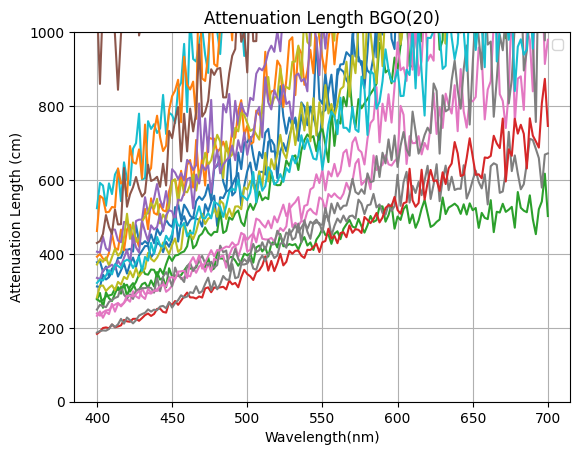

In [17]:
for m in list(range(1,21)):
    plt.figure(1)
    #plt.plot(lam, Tper_L[i-1], label = 'Longitudinal(16cm)')  
    #plt.plot(lam, Tper_T[i-1], label = 'Transverse(2.2cm)')
    #plt.figure(6+i)
    plt.plot(lam_At[m-1], AtLen[m-1])#, label = 'Attenuation Length (cm)'+str(m))
    plt.xlabel('Wavelength(nm)')
    plt.ylabel('Attenuation Length (cm)')
    plt.title('Attenuation Length BGO(' + str(i)+')' )
    plt.grid(True)
    plt.legend()
#print(Tper)
#print(Tper_L)
plt.ylim(0,1000)
plt.show()
plt.ion()

#NORMALIZATION WRT THE FIRST INTERSECTION

[Try using different code snippets to plot attenuation length. keep trhem in the same file as a complete code so u can run it each time . that means do proper intialization of all variables each time. Wtite your concerns about using different methods]


 and try to make sense about which approach is best according to you. Next important step is to figure out a way to store the data in root so it is easily accesible , perhaps using wavelength markers rather than index markers. again think how it might have been done for mat budget.
Keep this note dont delete yet. might be useful for writing in github repo.

[I like the plot above. HSows how i understand python a little and can adjust the data i wanna focus on, Try focusinng on a partivular area even idf ur data is going out of that particular x or y range.]


Once done with this and understand the party of storing data in root using youtube tutorials plot and fit for XEL. and also for decay time however the data for that is small but still
Also plot XEL and transmission together

Do not think tooo much if cant figure out. either ask discuss or check papers

IMPORT PACKAGES

In [ ]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

DEFINE VARIABLES

In [9]:
#p= Tper_L.tolist()
print(Tper_T)

[[0.840011, 0.920013, 0.960007, 0.87001, 0.87001, 0.840011, 0.750015, 0.750015, 0.800003, 0.770004, 0.750015, 0.780014, 0.700012, 0.710007, 0.730011, 0.710007, 0.710007, 0.710007, 0.690002, 0.670013, 0.680008, 0.650009, 0.650009, 0.640015, 0.630005, 0.62001, 0.61, 0.600006, 0.580002, 0.540008, 0.570007, 0.550003, 0.540008, 0.520004, 0.530014, 0.540008, 0.530014, 0.550003, 0.540008, 0.550003, 0.540008, 0.580002, 0.570007, 0.560013, 0.530014, 0.560013, 0.550003, 0.560013, 0.560013, 0.540008, 0.550003, 0.540008, 0.62001, 1.04, 3.8, 9.87001, 19.22, 29.38, 38.48, 45.22, 49.16, 52.06, 54.63, 56.94, 58.2, 60.06, 62.1, 62.78, 64.52, 65.55, 66.4, 66.83, 67.31, 68.6, 69.34, 69.63, 70.47, 69.79, 70.47, 70.65, 71.2, 71.98, 72.3, 72.11, 72.32, 73.01, 72.91, 73.12, 72.99, 73.54, 73.39, 73.54, 73.26, 73.93, 74.14, 73.35, 73.88, 74.01, 74.08, 74.22, 74.31, 74.28, 74.57, 74.56, 74.75, 74.57, 74.74, 74.89, 74.97, 74.73, 75.04, 74.95, 75.15, 75.17, 75.3, 75.32, 75.47, 75.31, 75.61, 75.47, 75.38, 75.66, 7

All TRANSMISSION

/var/folders/np/1nk6dbzn3dn79swcw81d2rkm0000gn/T/ipykernel_762/3680243253.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


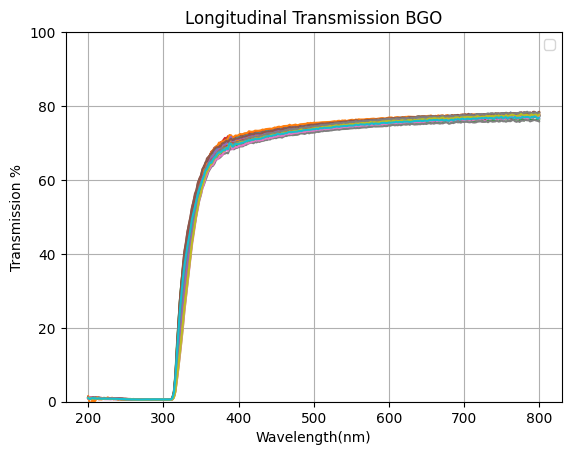

In [22]:
for m in list(range(1,21)):
    plt.figure(1)
    #plt.plot(lam, Tper_L[i-1], label = 'Longitudinal(16cm)')  
    #plt.plot(lam, Tper_T[i-1], label = 'Transverse(2.2cm)')
    #plt.figure(6+i)
    #plt.plot(lam, Tper_T[m-1])
    plt.plot(lam, Tper_L[m-1])# label = f'Transmittance BGO ({i})')#, label = 'Attenuation Length (cm)'+str(m))
    plt.xlabel('Wavelength(nm)')
    plt.ylabel('Transmission %')
    plt.title('Longitudinal Transmission BGO')
    plt.grid(True)
    plt.legend()
#print(Tper)
#plt.bar_label("hello")
#print(Tper_L)
#plt.xlim(700,800)
plt.ylim(0,100)
plt.show()
plt.ion()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


/var/folders/np/1nk6dbzn3dn79swcw81d2rkm0000gn/T/ipykernel_762/2796927350.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


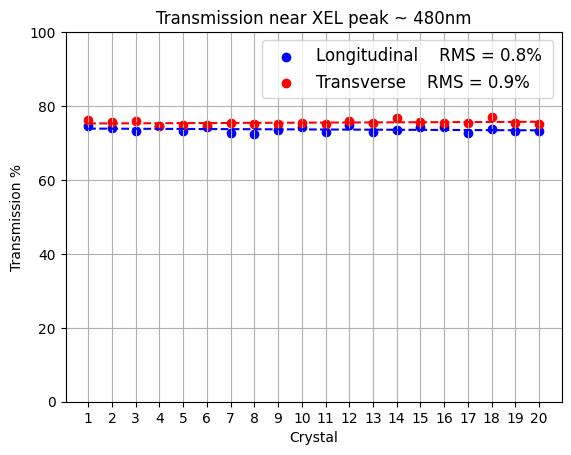

In [79]:
Crystal = list(range(1,21))
TL = [0] * 20 
TT = [0] * 20 
for m in Crystal:
    print(m)
    TL[m-1]=(Tper_L[m-1][140])
    TT[m-1]=(Tper_T[m-1][140])


# Calculate RMS values for each normalized dataset
def calculate_rms(data):
    return np.sqrt(np.mean((data - np.mean(data))**2))

rms_T = calculate_rms(TL)*100/np.mean(TL)
rms_L = calculate_rms(TT)*100/np.mean(TT)


# Plot data and fits for LO_1
#plt.errorbar(Crystal, TL, yerr= sigma_LO_1, fmt='o', markerfacecolor='none', markeredgecolor='red', label='Data')
#plt.plot(position_fit, fit_func(position_fit, *popt_T), color='black', linestyle='--', label=f'Fit: Transmission = Trans + delta')

# plt.text(8, 70, f'Longitudinal    RMS = {rms_L:.1f}% ', fontsize=14, verticalalignment='top')
# plt.text(8, 60, f'Transverse    RMS = {rms_T:.1f}% ', fontsize=14, verticalalignment='top')


plt.xlabel('Crystal')
plt.ylabel('Transmission %')
plt.title('Transmission near XEL peak ~ 480nm')
#plt.hist(TL, bins=1, edgecolor='black')
plt.grid(True)
plt.legend()
plt.ylim(0,100)
plt.scatter(Crystal, TL, color='blue', label=f'Longitudinal    RMS = {rms_L:.1f}% ', marker='o')
plt.scatter(Crystal, TT, color='red', label=f'Transverse    RMS = {rms_T:.1f}% ', marker='o')
coefficients = np.polyfit(Crystal, TL, 1)  # Fit a first-degree polynomial (linear trend)
polynomial = np.poly1d(coefficients)  # Get the polynomial object to evaluate the trend line
trend_line = polynomial(Crystal)  # Compute the trend line values

coefficientsT = np.polyfit(Crystal, TT, 1)  # Fit a first-degree polynomial (linear trend)
polynomialT = np.poly1d(coefficientsT)  # Get the polynomial object to evaluate the trend line
trend_lineT = polynomialT(Crystal)  # Compute the trend line values

# Plot the trend line
plt.plot(Crystal, trend_line, color='blue', linestyle='--')
plt.plot(Crystal, trend_lineT, color='red', linestyle='--')
plt.legend(fontsize =12)
plt.xticks(Crystal)
plt.show()



In [56]:
print(TL)


[74.61, 74.05, 73.3, 74.66, 73.2, 74.25, 72.8, 72.33, 73.61, 74.28, 73.04, 74.88, 73.11, 73.52, 74.28, 74.36, 72.84, 73.67, 73.3, 73.21]


In [49]:
TL[0]

IndexError: list index out of range